### Problem Part A: Robin (I like ice cream, you like ice cream, we all like ice cream)

Slade has first targeted Robin, since he is sort of the ‘leader’ of Teen Titans. 

He wants to ‘trick’ Robin into thinking that some ice cream bars are actually ‘super power’ food, while in reality, they are actually kryptonite to make Robin seriously ill. However, Robin himself has a stash of ‘antidote’ should he fall ill. 

Apply the simple K-Means algorithm to ensure that Robin eats the least possible amount of ‘fake’ bars, while eating just enough antidote, given the confusion matrix: 

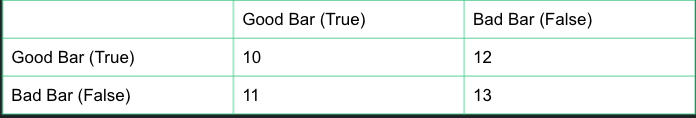

In [1]:
from IPython.display import Image
Image("robin_matrix.png")

In [2]:
# Import PCA and matplotlib. 

import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
import pandas as pd

# import k-means 
from sklearn.cluster import KMeans

[[10 12]
 [11 13]]
[1. 0.]
[1. 0.]


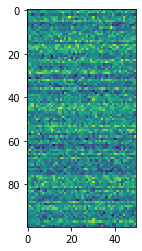

In [83]:
# Coding solution, using PCA and 2 clusters. 

# Source: https://stackoverflow.com/questions/45114760/how-to-plot-the-confusion-similarity-matrix-of-a-k-mean-algorithm

# Make random samples of true good bars and true bad bars. 

# PCA

# NP array. 
X = np.array([[10,12],[11,13]])
print(X)

pca = PCA(n_components=2)
pca.fit(X)

# Print the statistics here. 
print(pca.explained_variance_ratio_)

print(pca.singular_values_)

# Second PCA, given data 
# User input
n_samples  = 100
n_features = 50

# Prep
truth = np.empty(n_samples)
data  = np.empty((n_samples, n_features))
np.random.seed(42)

# Generate
for i,mu in enumerate(np.random.choice([0,1,2,3], n_samples, replace=True)):
    truth[i]  = mu
    data[i,:] = np.random.normal(loc=mu, scale=1.5, size=n_features)

# Show
plt.imshow(data, interpolation='none')
plt.show()

In [84]:
# Plotting the clusters with 2 components. 

pca2 = PCA(n_components=2).fit(data)
data2D = pca2.transform(data)
print(data2D)

# Kmeans
km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=3, random_state=0)
km.fit(data2D)
print(km)

[[ -2.35450875  -0.94703091]
 [ -8.99292448   0.32964119]
 [ 10.25313248   0.4078672 ]
 [ -3.67092527  -4.71415551]
 [ -2.0730489   -3.92060676]
 [-11.42006534   0.56170099]
 [ 11.17311472   3.62675225]
 [ 11.19735438  -2.01371969]
 [ -1.00585777   4.04482977]
 [  7.33984332  -0.0740865 ]
 [ -2.51989018   4.18784269]
 [ -3.72583354   2.53388271]
 [ -1.81573136  -0.54796754]
 [ -2.22594195  -2.64900944]
 [ -9.84869954   0.88312775]
 [ 10.58975579   2.27426426]
 [-12.21015263  -1.6904586 ]
 [-11.28174823  -3.598824  ]
 [ -9.59060334  -1.83817011]
 [ -4.56334294   4.9332538 ]
 [  4.12005485   2.38150566]
 [  8.44075492   0.81963074]
 [  5.01913919  -4.28196115]
 [-10.89200083   3.68278815]
 [ -8.30601327   1.99201417]
 [  3.57639524  -0.23222526]
 [  5.69428701  -0.46023467]
 [  2.5399489   -1.13060525]
 [-10.73596474  -3.72193903]
 [-11.33060169  -3.69842415]
 [ 12.41229072  -2.8002194 ]
 [ 11.26542312   3.51377755]
 [-11.53436002   0.17118023]
 [  3.04122648  -1.39058875]
 [  4.52203187

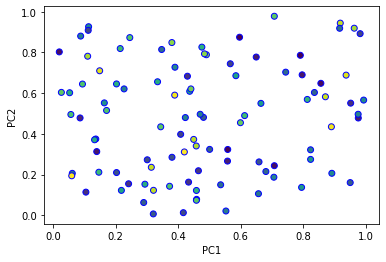

In [3]:
# Show

# Scatter plot back with 1D array. 
# We will choose a random sample of 100 different types of bars Robin can choose from. 
randomBars = np.array(np.random.random((100,3))) 

# Add in third column to bring variety of colors. 
plt.scatter(randomBars[:,0],randomBars[:,1],c=randomBars[:,2],edgecolor='b')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [86]:
# We then determine the closest values from the K-Means to solve the problem. 
# Source: https://stackoverflow.com/questions/54240144/distance-between-nodes-and-the-centroid-in-a-kmeans-cluster
# Apply k-means transform to get the approximate best value for least number of bars Robin can eat to avoid 
# getting sick. 

def determine_closest_values():
    distances = km.transform(data2D)**2 # Hamming distance calculate 
    distances_dataframe = pd.DataFrame(distances.sum(axis=1).round(2), columns=['best value'])
    # distances_dataframe['label'] = y
    # Reduce the output to 10 to reduce the clustering centroid factor.
    print(distances_dataframe.head(10))
    print(type(distances_dataframe.head()))
    
    # print sorted. 
    print("Sorted best values for Robin to avoid getting sick eating 'bad' ice cream bars: \n")
    print(sorted(np.array(distances_dataframe.head(10))))
    
determine_closest_values()

   best value
0      306.76
1      650.49
2      614.80
3      433.73
4      358.39
5      866.21
6      738.52
7      705.39
8      340.06
9      429.37
<class 'pandas.core.frame.DataFrame'>
Sorted best values for Robin to avoid getting sick eating 'bad' ice cream bars: 

[array([306.76]), array([340.06]), array([358.39]), array([429.37]), array([433.73]), array([614.8]), array([650.49]), array([705.39]), array([738.52]), array([866.21])]


So, based on the above values, the least amount of 'fake bars' Robin can eat and avoid being sick is 10. 